In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xls = pd.ExcelFile('C:/Users/Administrator/Desktop/data/bicycle crash data.xlsx')
df = pd.read_excel(xls,'Sheet')
df.head()

,Geo Point,Geo Shape,Ambulance,Biker Age Group,Biker Age,Bike Direction,Biker Injury,Bike Position,Biker Race,Biker Sex,...,Road Condition,Road Configuration,Road Defects,Road Feature,Road Surface,Rural/Urban,Speed Limit,Traffic Control,Weather,Workzone
0,"35.9100670923, -79.0745027481","{u'type': u'Point', u'coordinates': [-79.07450...",Yes,70+,70+,With Traffic,K: Killed,Travel Lane,White,Male,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,20 - 25 MPH,No Control Present,Clear,No
1,"36.0151171157, -79.0306027406","{u'type': u'Point', u'coordinates': [-79.03060...",No,20-24,24,With Traffic,C: Possible Injury,Travel Lane,White,Male,...,Dry,"Two-Way, Not Divided",None,"Driveway, Private",Coarse Asphalt,Rural,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Clear,No
2,"35.9889631116, -78.9887827261","{u'type': u'Point', u'coordinates': [-78.98878...",Yes,25-29,26,With Traffic,B: Evident Injury,Travel Lane,Black,Male,...,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Urban,40 - 45 MPH,"Double Yellow Line, No Passing Zone",Clear,No
3,"35.9227900944, -79.0888327525","{u'type': u'Point', u'coordinates': [-79.08883...",Yes,30-39,33,With Traffic,B: Evident Injury,Travel Lane,White,Female,...,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Urban,30 - 35 MPH,Missing,Clear,No
4,"36.0100771166, -78.9900027276","{u'type': u'Point', u'coordinates': [-78.99000...",Yes,40-49,41,With Traffic,B: Evident Injury,Travel Lane,White,Female,...,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Rural,40 - 45 MPH,Stop Sign,Clear,No


In [4]:
df.columns

Index(['Geo Point', 'Geo Shape', 'Ambulance', 'Biker Age Group', 'Biker Age',
       'Bike Direction', 'Biker Injury', 'Bike Position', 'Biker Race',
       'Biker Sex', 'City', 'County', 'Biker Intox.', 'Day',
       'Cause of Incident', 'Location of Crash', 'Month',
       'Time (Military Time)', 'Crash Type', 'Year', 'Severity of Crash',
       'Development', 'Driver Age Group', 'Driver Age', 'Driver Intox.',
       'Driver Estimated Speed', 'Driver Injury', 'Driver Race', 'Driver Sex',
       'Driver Vehicle Type', 'Excessive Speeding', 'Hit and Run',
       'Lighting Conditions', 'Locality', 'Number of Lanes', 'Number of Units',
       'Road Characteristics', 'Road Class', 'Road Condition',
       'Road Configuration', 'Road Defects', 'Road Feature', 'Road Surface',
       'Rural/Urban', 'Speed Limit', 'Traffic Control', 'Weather', 'Workzone'],
      dtype='object')

In [5]:
print(df.dtypes)

Geo Point                 object
Geo Shape                 object
Ambulance                 object
Biker Age Group           object
Biker Age                 object
Bike Direction            object
Biker Injury              object
Bike Position             object
Biker Race                object
Biker Sex                 object
City                      object
County                    object
Biker Intox.              object
Day                       object
Cause of Incident         object
Location of Crash         object
Month                     object
Time (Military Time)      object
Crash Type                object
Year                       int64
Severity of Crash         object
Development               object
Driver Age Group          object
Driver Age                object
Driver Intox.             object
Driver Estimated Speed    object
Driver Injury             object
Driver Race               object
Driver Sex                object
Driver Vehicle Type       object
Excessive 

In [18]:
df.groupby(['Severity of Crash']).describe()

Year                                                 \
                    count         mean       std     min     25%     50%   
Severity of Crash                                                          
A: Disabling Injury   5.0  2009.200000  1.788854  2007.0  2008.0  2009.0   
B: Evident Injury    85.0  2009.964706  1.930008  2007.0  2008.0  2010.0   
C: Possible Injury   62.0  2010.032258  1.916005  2007.0  2008.0  2010.0   
K: Killed             3.0  2012.000000  1.000000  2011.0  2011.5  2012.0   
O: No Injury         10.0  2010.000000  2.260777  2007.0  2008.0  2010.0   

                                     Number of Units                           \
                         75%     max           count      mean       std  min   
Severity of Crash                                                               
A: Disabling Injury  2011.00  2011.0             5.0  2.000000  0.000000  2.0   
B: Evident Injury    2012.00  2013.0            85.0  2.000000  0.000000  2.0   
C: Possible Injury   2012.00  2013.0            62.0  2.032258  0.178127  2.0   
K: Killed            2012.50  2013.0             3.0  2.333333  0.577350  2.0   
O: No Injury         2011.75  2013.0            10.0  2.000000  0.000000  2.0   

                                         
                     25%  50%  75%  max  
Severity of Crash                        
A: Disabling Injury  2.0  2.0  2.0  2.0  
B: Evident Injury    2.0  2.0  2.0  2.0  
C: Possible Injury   2.0  2.0  2.0  3.0  
K: Killed            2.0  2.0  2.5  3.0  
O: No Injury         2.0  2.0  2.0  2.0

Severity of Crash
A: Disabling Injury     5
B: Evident Injury      85
C: Possible Injury     62
K: Killed               3
O: No Injury           10
dtype: int64


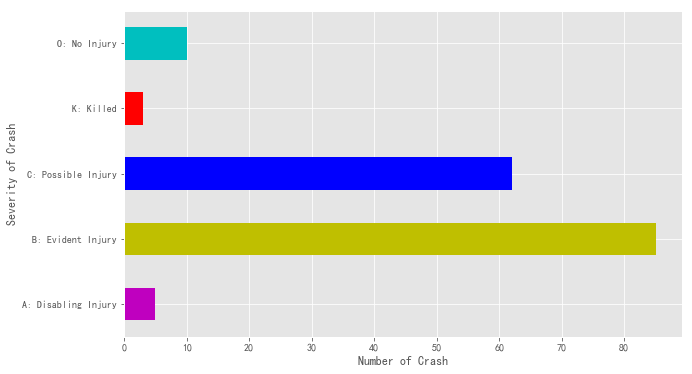

In [183]:
fig = plt.figure(figsize=(10,6))
groups = df.groupby(['Severity of Crash']).size()
print(groups)
groups.plot.barh(color=['m','y','b', 'r', 'c'])
plt.ylabel('Severity of Crash')
#plt.xticks(rotation=45)
plt.xlabel('Number of Crash')
plt.show()

Month
April        22
August       17
December     11
February     10
January       7
July         11
June         11
March         9
May          12
November     11
October      16
September    28
dtype: int64


Text(0, 0.5, 'Number of Crash')

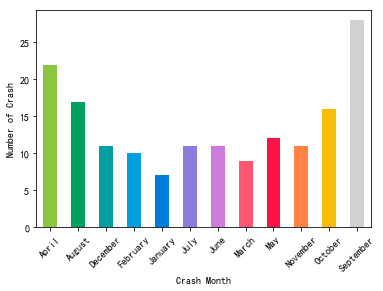

In [58]:
groups2 = df.groupby(['Month']).size()
print(groups2)
groups2.plot.bar(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Crash Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Crash')

In [117]:
for year in [2007,2008,2009,2010,2011,2012,2013]:
    df_new = df[df['Year'] == year].groupby(['Severity of Crash']).size()
    print(year)
    print(df_new)

2007
Severity of Crash
A: Disabling Injury    1
B: Evident Injury      7
C: Possible Injury     5
O: No Injury           1
dtype: int64
2008
Severity of Crash
A: Disabling Injury     1
B: Evident Injury      21
C: Possible Injury     12
O: No Injury            3
dtype: int64
2009
Severity of Crash
A: Disabling Injury     1
B: Evident Injury       9
C: Possible Injury     11
O: No Injury            1
dtype: int64
2010
Severity of Crash
B: Evident Injury     14
C: Possible Injury     8
dtype: int64
2011
Severity of Crash
A: Disabling Injury    2
B: Evident Injury      8
C: Possible Injury     8
K: Killed              1
O: No Injury           2
dtype: int64
2012
Severity of Crash
B: Evident Injury     17
C: Possible Injury    10
K: Killed              1
O: No Injury           1
dtype: int64
2013
Severity of Crash
B: Evident Injury     9
C: Possible Injury    8
K: Killed             1
O: No Injury          2
dtype: int64


Biker Age Group
11-15      10
16-19      17
20-24      37
25-29      22
30-39      25
40-49      16
50-59      19
6-10        6
60-69       7
70+         4
Unknown     2
dtype: int64


Text(0, 0.5, 'Number of Crash')

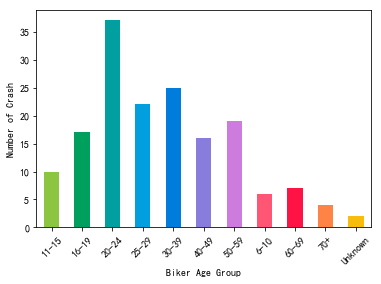

In [60]:
groups3 = df.groupby(['Biker Age Group']).size()
print(groups3)
groups3.plot.bar(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Biker Age Group')
plt.xticks(rotation=45)
plt.ylabel('Number of Crash')

Weather
Clear     137
Cloudy     20
Rain        8
dtype: int64


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Number of Crash')

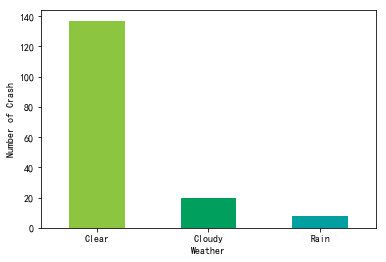

In [63]:
groups4 = df.groupby(['Weather']).size()
print(groups4)
groups4.plot.bar(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Weather')
plt.xticks(rotation=0)
plt.ylabel('Number of Crash')

City
Carrboro              31
Chapel Hill           94
Durham                12
None - Rural Crash    28
dtype: int64


Text(0, 0.5, 'Number of Crash')

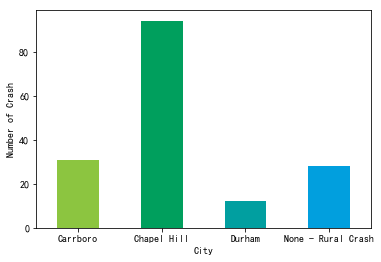

In [64]:
groups5 = df.groupby(['City']).size()
print(groups5)
groups5.plot.bar(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('Number of Crash')

Day
Friday       26
Monday       16
Saturday     19
Sunday       12
Thursday     33
Tuesday      34
Wednesday    25
dtype: int64


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Number of Crash')

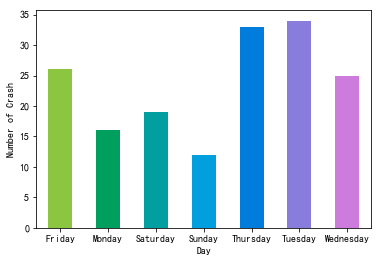

In [66]:
groups6 = df.groupby(['Day']).size()
print(groups6)
groups6.plot.bar(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Number of Crash')

Traffic Control
Double Yellow Line, No Passing Zone    25
Missing                                 7
No Control Present                     65
Other                                   1
Stop And Go Signal                     37
Stop Sign                              29
Yield Sign                              1
dtype: int64


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


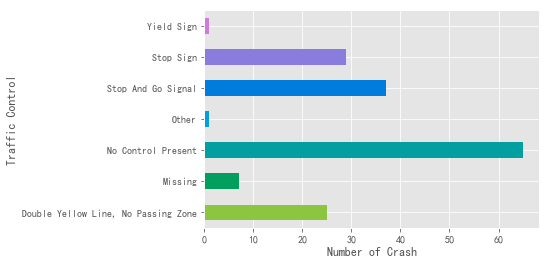

In [180]:
groups7 = df.groupby(['Traffic Control']).size()
print(groups7)
groups7.plot.barh(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.ylabel('Traffic Control')
plt.xlabel('Number of Crash')
plt.show()

Road Surface
Coarse Asphalt     29
Concrete            3
Gravel              1
Other               1
Smooth Asphalt    131
dtype: int64


Text(0, 0.5, 'Number of Crash')

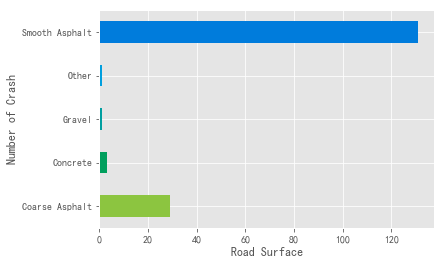

In [179]:
groups8 = df.groupby(['Road Surface']).size()
print(groups8)
groups8.plot.barh(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Road Surface')
# plt.xticks(rotation=90)
plt.ylabel('Number of Crash')

Road Feature
Driveway, Private           6
Driveway, Public            8
Four-Way Intersection      28
No Special Feature         88
On or Off Ramp              3
Other                       1
Related To Intersection     4
T-Intersection             26
Y-Intersection              1
dtype: int64


Text(0, 0.5, 'Number of Crash')

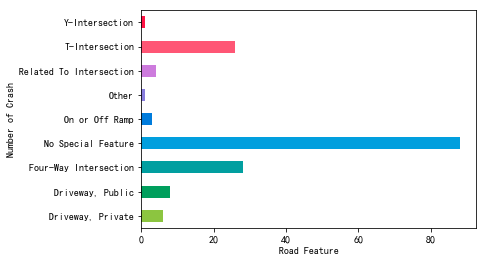

In [103]:
groups8 = df.groupby(['Road Feature']).size()
print(groups8)
groups8.plot.barh(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Road Feature')
# plt.xticks(rotation=90)
plt.ylabel('Number of Crash')

Road Characteristics
Curve - Bottom            1
Curve - Grade             7
Curve - Hillcrest         3
Curve - Level             4
Straight - Bottom         4
Straight - Grade         34
Straight - Hillcrest      7
Straight - Level        105
dtype: int64


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Number of Crash')

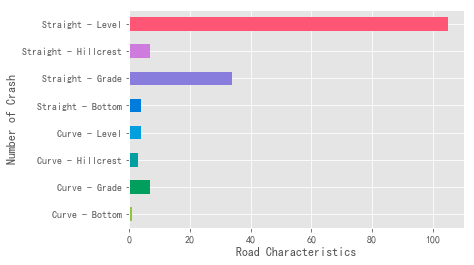

In [144]:
groups9 = df.groupby(['Road Characteristics']).size()
print(groups9)
groups9.plot.barh(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Road Characteristics')
# plt.xticks(rotation=90)
plt.ylabel('Number of Crash')

Year
2007    14
2008    37
2009    22
2010    22
2011    21
2012    29
2013    20
dtype: int64


C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0, 0.5, 'Number of Crash')

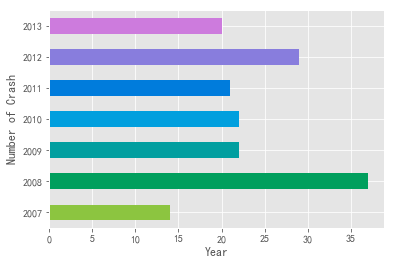

In [146]:
groups10 = df.groupby(['Year']).size()
print(groups10)
groups10.plot.barh(colors=['#8cc540','#009f5d','#019fa0','#019fde','#007cdc','#887ddd','#cd7bdd','#ff5675','#ff1244','#ff8345','#f8bd0b','#d1d2d4'])
plt.xlabel('Year')
# plt.xticks(rotation=90)
plt.ylabel('Number of Crash')

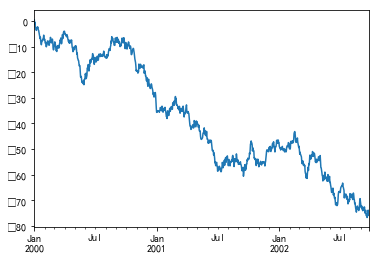

In [125]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

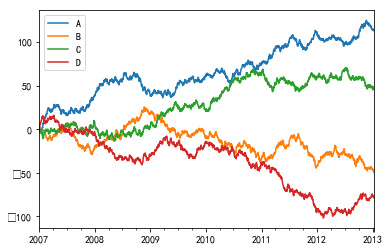

In [126]:
df = pd.DataFrame(np.random.randn(2200, 4), index=pd.date_range('1/1/2007', periods=2200), columns=list('ABCD'))
df = df.cumsum()
df.plot()

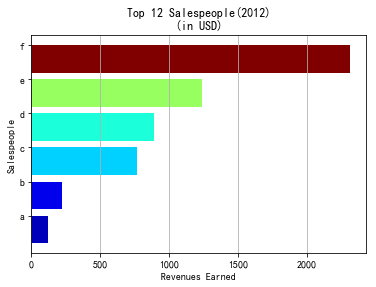

In [94]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
 
label = ['a','b','c','d','e','f']
x = sorted([1234,221,765,124,2312,890])
 
idx = np.arange(len(x))
color = cm.jet(np.array(x)/max(x))
plt.barh(idx, x, color=color)
plt.yticks(idx+0.4,label)
plt.grid(axis='x')
 
plt.xlabel('Revenues Earned')
plt.ylabel('Salespeople')
plt.title('Top 12 Salespeople(2012)\n(in USD)')
 
plt.show()

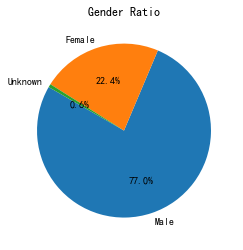

In [88]:
df_male = df[df['Biker Sex'] == 'Male']
df_female = df[df['Biker Sex'] == 'Female']
r_male=len(df_male)/(len(df))
r_female=len(df_female)/(len(df))
r_unknown=1-r_male-r_female
labels = ['Male','Female','Unknown']
sizes = [r_male,r_female,r_unknown]
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Gender Ratio")
#plt.axis('equal')   #该行代码使饼图长宽相等
plt.show()
# explode = (0,0,0,0.1,0,0)
# plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
# plt.title("Gender Ratio")
# plt.show() 

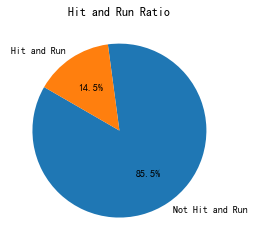

In [104]:
df_hitrun = df[df['Hit and Run'] == 'Yes']
r_hitrun=len(df_hitrun)/(len(df))
r_nothitrun=1-r_hitrun
labels = ['Not Hit and Run','Hit and Run']
sizes = [r_nothitrun,r_hitrun]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Hit and Run Ratio")
plt.show()

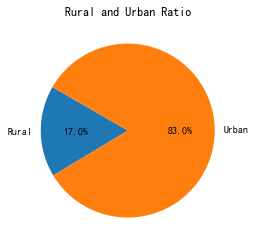

In [106]:
df_urban = df[df['Rural/Urban'] == 'Urban']
r_urban=len(df_urban)/(len(df))
r_rural=1-r_urban
labels = ['Rural','Urban']
sizes = [r_rural,r_urban]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("Rural and Urban Ratio")
plt.show()

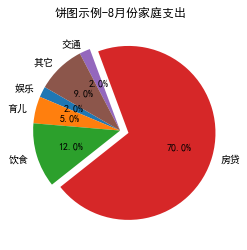

In [40]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
labels = ['娱乐','育儿','饮食','房贷','交通','其它']
sizes = [2,5,12,70,2,9]
explode = (0,0,0,0.1,0,0)
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.title("饼图示例-8月份家庭支出")
#plt.axis('equal')   #该行代码使饼图长宽相等
plt.show()

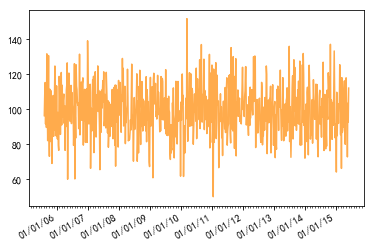

In [65]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots()

months = mdates.MonthLocator()

dateFmt = mdates.DateFormatter("%m/%d/%y")

ax.xaxis.set_major_formatter(dateFmt)
ax.xaxis.set_minor_locator(months)
ax.tick_params(axis="both", direction="out", labelsize=10)

date1 = datetime.date(2005, 8, 8)
date2 = datetime.date(2015, 6, 6)
delta = datetime.timedelta(days=5)
dates = mdates.drange(date1, date2, delta)

y = np.random.normal(100, 15, len(dates))

ax.plot_date(dates, y, "#FF8800", alpha=0.7)

fig.autofmt_xdate()

plt.show()

In [139]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt
xls = pd.ExcelFile('C:/Users/Administrator/Desktop/data/bicycle crash data.xlsx')
df3 = pd.read_excel(xls,'Sheet3')
df3.head()

,date,num
0,2007-04-01,3
1,2007-12-01,2
2,2007-01-01,1
3,2007-07-01,1
4,2007-06-01,1


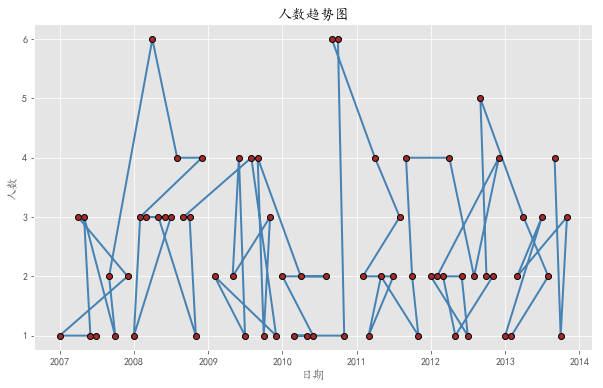

In [159]:
fig = plt.figure(figsize=(10,6))
plt.plot(df3.date, # x轴数据
         df3.num, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色
# 添加标题和坐标轴标签
plt.title('人数趋势图')
plt.xlabel('日期')
plt.ylabel('人数')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 显示图形
plt.show()

In [166]:
xls = pd.ExcelFile('C:/Users/Administrator/Desktop/data/bicycle crash data.xlsx')
df4 = pd.read_excel(xls,'Sheet4')
df4.head()

,date,A,B,C,O,K,Total
0,2007,1,7,5,1,0,14
1,2008,1,21,12,3,0,37
2,2009,1,9,11,1,0,22
3,2010,0,14,8,0,0,22
4,2011,2,8,8,2,1,21


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


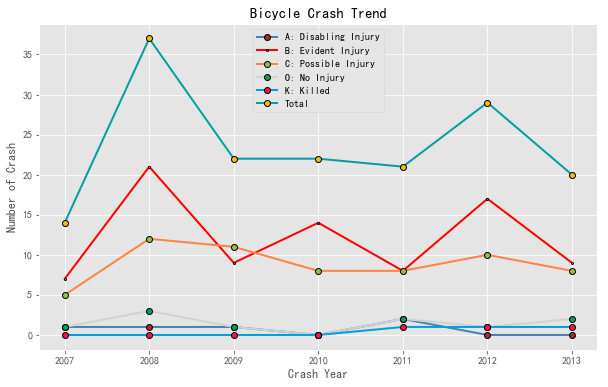

In [177]:
fig = plt.figure(figsize=(10,6))
plt.plot(df4.date, # x轴数据
         df4.A, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown',
         label='A: Disabling Injury') # 点的填充色
plt.plot(df4.date, # x轴数据
         df4.B, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'r', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 2, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#ff9999', # 点的填充色
         label='B: Evident Injury') # 点的填充色
plt.plot(df4.date, # x轴数据
         df4.C, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#ff8345', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#8cc540',
         label='C: Possible Injury') # 点的填充色
plt.plot(df4.date, # x轴数据
         df4.O, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#d1d2d4', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#009f5d',
         label='O: No Injury') # 点的填充色
plt.plot(df4.date, # x轴数据
         df4.K, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#019fde', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#ff1244',
         label='K: Killed') # 点的填充色
plt.plot(df4.date, # x轴数据
         df4.Total, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = '#019fa0', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='#f8bd0b',
         label='Total') # 点的填充色
# 添加标题和坐标轴标签
plt.title('Bicycle Crash Trend')
plt.xlabel('Crash Year')
plt.ylabel('Number of Crash')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

plt.legend()
plt.show()